In [ ]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from tifffile import *
from glob import glob
!pip install rasterio
!pip install earthpy
import rasterio

import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from matplotlib.patches import Patch
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

from matplotlib.colors import Normalize
from scipy.interpolate import interpn
import rasterio as rio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

# Import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Import Python 3's print function and division
from __future__ import print_function, division

# Import GDAL, NumPy, and matplotlib
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from osgeo import gdal
import os
import glob
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)


from scipy.ndimage.filters import generic_filter
from scipy.stats import mode

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import xgboost as xgb


np.seterr(divide='ignore', invalid='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 68.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.3 MB/s eta 0:00:00


<ipython-input-3-65c36ec18b74>:73: DeprecationWarning: Please use `generic_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import generic_filter


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
# PRISMA image:
with rasterio.open('/content/drive/MyDrive/PRISMA/PRISMA_mosaic_full.tif') as src:
    image = src.read()

In [ ]:
image[image==0] = np.nan # set 0 to NaN
image_no_ref = image[0:234,:,:] # select image without reference band
reference = image[234,:,:] # select reference band

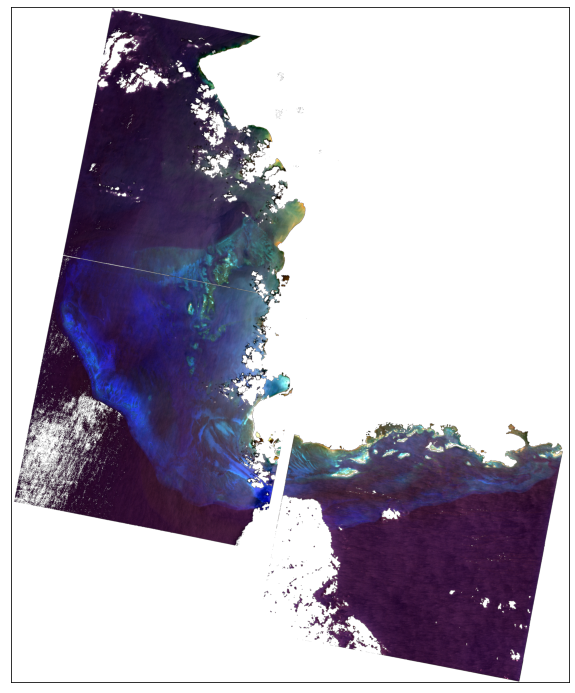

In [ ]:
ep.plot_rgb(image,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

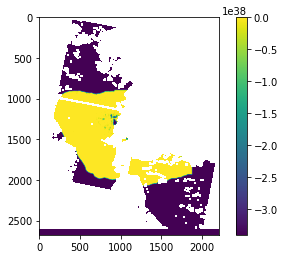

In [ ]:
pc = plt.imshow(image[-1,:,:])
plt.colorbar(pc)

In [ ]:
reference[reference<-110] = np.nan
reference[reference == 0] = np.nan
reference[reference>0] = np.nan

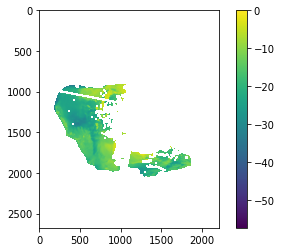

In [ ]:
pc = plt.imshow(reference)
plt.colorbar(pc)

In [ ]:
reference_1 = reference.copy()

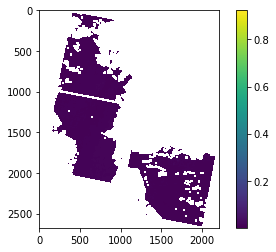

In [ ]:
pc = plt.imshow(image_no_ref[100,:,:])
plt.colorbar(pc)

In [ ]:
image_0 = np.nan_to_num(image)

In [ ]:
reference_1[reference_1 > 0] = 1
reference_1[reference_1 < 0] = 1

In [ ]:
unique, counts = np.unique(reference_1, return_counts=True)
print(np.asarray((unique, counts)).T)

[[1.000000e+00 9.087140e+05]
 [         nan 5.007922e+06]]


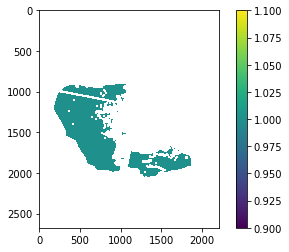

In [ ]:
pc = plt.imshow(reference_1)
plt.colorbar(pc)

In [ ]:
image_test = image_0 * reference_1

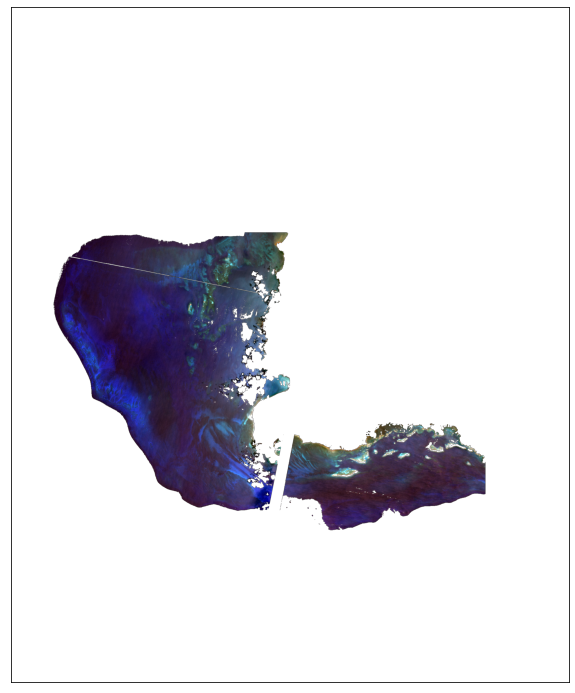

In [ ]:
ep.plot_rgb(image_test,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
pixel_sum = np.sum(image_test[0:-1,:,:], axis=0)

# Use np.where to set all bands to np.nan if pixel sum is 0
image = np.where(pixel_sum == 0, np.nan, image_test)

In [ ]:
for i in range(235):
  image_red = image_test[i,:,:]
  image_red = image_red[~np.isnan(image_red)]
  shape = image_red.shape[0]
  if shape != 908714:
    print(f'band {i} has uneven amount of pixels in this band')

# conclusion: all bands have got 908714 pixels

In [ ]:
image = image_test[:,800:2100,100:1900]

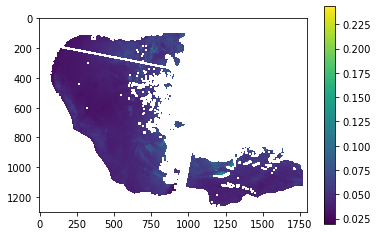

In [ ]:
pc = plt.imshow(image[20,:,:])
plt.colorbar(pc)

In [ ]:
def clean_image(image):
    # Create a mask for the pixels where the last band is less than -20
    mask = image[:, :, -1] < -20
    image[mask, :] = np.nan
    return image

In [ ]:
image.shape

(235, 1300, 1800)

In [ ]:
image_20_t = np.transpose(image,(2,0,1))


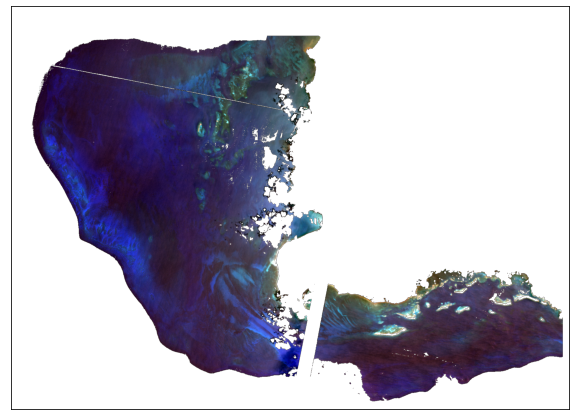

In [ ]:
ep.plot_rgb(image,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

## Make area splits

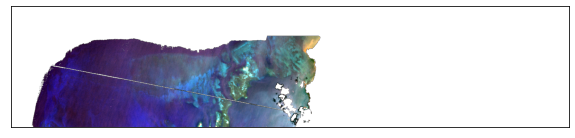

227550


In [ ]:
image_area_1 = image[:,0:390,:]
ep.plot_rgb(image_area_1,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_1[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

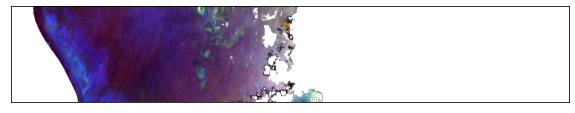

226747


In [ ]:
image_area_2 = image[:,390:700,:]
ep.plot_rgb(image_area_2,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_2[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

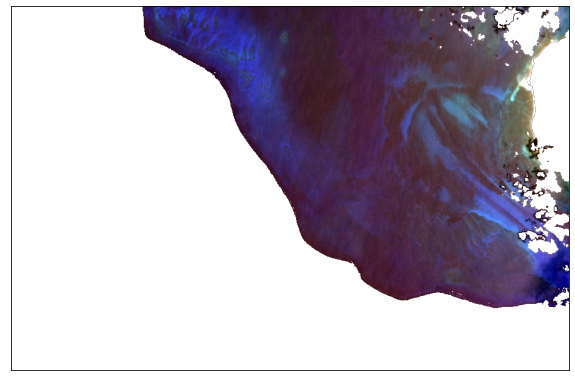

226998


In [ ]:
image_area_3 = image[:,700:,0:920]
ep.plot_rgb(image_area_3,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_3[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

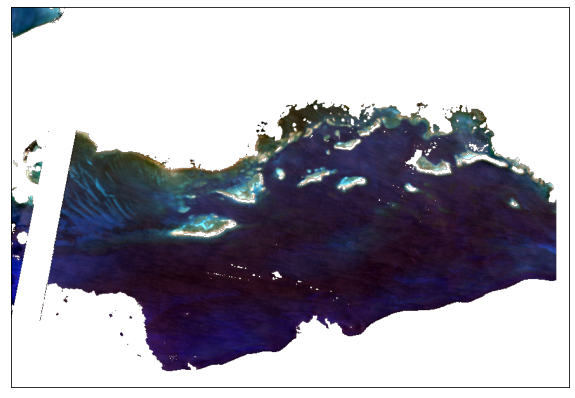

226998


In [ ]:
image_area_4 = image[:,700:,920:]
ep.plot_rgb(image_area_4,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_3[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

In [ ]:
image_1_shape = np.moveaxis(image_area_1, 0, -1)
image_1_no_nan = image_1_shape[~np.isnan(image_1_shape).any(axis=2)]

image_2_shape = np.moveaxis(image_area_2, 0, -1)
image_2_no_nan = image_2_shape[~np.isnan(image_2_shape).any(axis=2)]

image_3_shape = np.moveaxis(image_area_3, 0, -1)
image_3_no_nan = image_3_shape[~np.isnan(image_3_shape).any(axis=2)]

image_4_shape = np.moveaxis(image_area_4, 0, -1)
image_4_no_nan = image_4_shape[~np.isnan(image_4_shape).any(axis=2)]

In [ ]:
X = image_1_no_nan
X_train = image_1_no_nan[:,:-1]
y_train = image_1_no_nan[:,-1]

X_test = image_2_no_nan[:,:-1]
y_test = image_2_no_nan[:,-1]

In [ ]:
# train splits X:
X_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:-1]
print(X_train_1_2_3.shape)
X_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:-1]
print(X_train_1_2_4.shape)
X_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:-1]
print(X_train_1_3_4.shape)
X_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:-1]
print(X_train_2_3_4.shape)

# train splits y:
y_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,-1]
print(y_train_1_2_3.shape)
y_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_2_4.shape)
y_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_3_4.shape)
y_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_2_3_4.shape)

(681295, 234)
(681716, 234)
(681967, 234)
(681164, 234)
(681295,)
(681716,)
(681967,)
(681164,)


In [ ]:
# Test splits X:
X_test_1 = image_1_no_nan[:,0:-1]
print(X_test_1.shape)
X_test_2 = image_2_no_nan[:,0:-1]
print(X_test_2.shape)
X_test_3 = image_3_no_nan[:,0:-1]
print(X_test_3.shape)
X_test_4 = image_4_no_nan[:,0:-1]
print(X_test_4.shape)

# Test splits y:
y_test_1 = image_1_no_nan[:,-1]
print(y_test_1.shape)
y_test_2 = image_2_no_nan[:,-1]
print(y_test_2.shape)
y_test_3 = image_3_no_nan[:,-1]
print(y_test_3.shape)
y_test_4 = image_4_no_nan[:,-1]
print(y_test_4.shape)

(227550, 234)
(226747, 234)
(226998, 234)
(227419, 234)
(227550,)
(226747,)
(226998,)
(227419,)


In [ ]:
model = xgb.XGBRegressor(
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 reg_lambda=0.1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 learning_rate =0.01,
 tree_method='gpu_hist',
 gpu_id=0,
 seed=27)

In [ ]:
# Train: 1,2,3. Test: 4
model.fit(X_train_1_2_3, y_train_1_2_3)
y_pred_4 = model.predict(X_test_4)

# Train: 1,2,4. Test: 3
model.fit(X_train_1_2_4, y_train_1_2_4)
y_pred_3 = model.predict(X_test_3)

# Train: 1,3,4. Test: 2
model.fit(X_train_1_3_4, y_train_1_3_4)
y_pred_2 = model.predict(X_test_2)

# Train: 2,3,4. Test: 1
model.fit(X_train_2_3_4, y_train_2_3_4)
y_pred_1 = model.predict(X_test_1)

In [ ]:
print(y_pred_1.shape, 'y_pred_1')
print(y_test_1.shape, 'y_test_1')
print(y_pred_2.shape, 'y_pred_2')
print(y_test_2.shape, 'y_test_2')
print(y_pred_3.shape, 'y_pred_3')
print(y_test_3.shape, 'y_test_3')
print(y_pred_4.shape, 'y_pred_4')
print(y_test_4.shape, 'y_test_4')

(227550,) y_pred_1
(227550,) y_test_1
(226747,) y_pred_2
(226747,) y_test_2
(226998,) y_pred_3
(226998,) y_test_3
(227419,) y_pred_4
(227419,) y_test_4


In [ ]:
def calculate_metrics_area(y_pred, y_test):
    """
    This function takes in two inputs, y_pred_1_2_3 and a, and outputs the rmse, r2 and mae.
    """
    y = y_pred[~np.isnan(y_pred)]
    df_y_pred = pd.DataFrame(y)
    y_test = y_test.flatten()
    y_test = y_test[~np.isnan(y_test)]
    df_y_test = pd.DataFrame(y_test)
    # concatenate the two dataframes and remove NaN values
    df = pd.concat([df_y_test, df_y_pred], axis=1)
    df = df.dropna()
    df.columns = ['Reference','Predicted']
    df = df.reset_index(drop=True)
    df['Error'] = df['Predicted'] - df['Reference']
    # calculate metrics
    rmse = mean_squared_error(df.Reference, df.Predicted, squared=False)
    r2 = r2_score(df.Reference, df.Predicted)
    mae = np.mean(abs(df.Reference - df.Predicted))
    return rmse, r2, mae

In [ ]:
rmse,r2,mae = calculate_metrics_area(y_pred_1, y_test_1)
metrics_1 = list((rmse, r2, mae))
print(metrics_1,'area 1')

rmse,r2,mae = calculate_metrics_area(y_pred_2, y_test_2)
metrics_2 = list((rmse, r2, mae))
print(metrics_2, 'area 2')

rmse,r2,mae = calculate_metrics_area(y_pred_3, y_test_3)
metrics_3 = list((rmse, r2, mae))
print(metrics_3, 'area 3')

rmse,r2,mae = calculate_metrics_area(y_pred_4, y_test_4)
metrics_4 = list((rmse, r2, mae))
print(metrics_4, 'area 4')

[4.029398, 0.7967541685808347, 2.28802] area 1
[3.0019941, 0.781837485762729, 2.2842622] area 2
[2.0843978, 0.8088164513508491, 1.4136336] area 3
[2.7245314, 0.8460152648535009, 2.0185761] area 4


In [ ]:
df_pred = pd.DataFrame(y_pred_1)
df_test = pd.DataFrame(y_test_1)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
df2= df2[df2['Reference'] > -20] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

MAE: 1.6531662
RMSE 2.44699
R2: 0.7367178913023257


MAE: 2.28802
RMSE 4.029398
R2: 0.7967541685808347


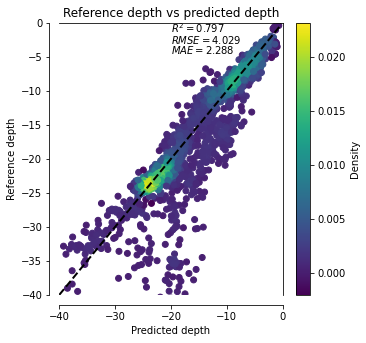

In [ ]:
### y_pred_1

df_pred = pd.DataFrame(y_pred_1)
df_test = pd.DataFrame(y_test_1)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
#df2= df2[df2['Reference'] > -20] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-40,0])
    ax.set_ylim([-40,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -3))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -4.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])

MAE: 2.2842622
RMSE 3.0019941
R2: 0.781837485762729


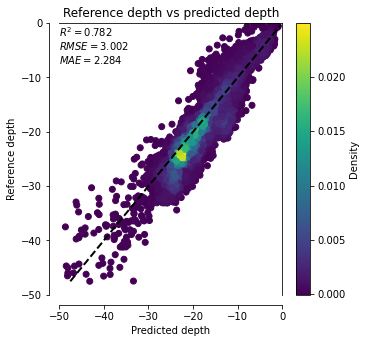

In [ ]:
### y_pred_2

df_pred = pd.DataFrame(y_pred_2)
df_test = pd.DataFrame(y_test_2)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
#df2= df2[df2['Reference'] > -20] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

df3_sample = df3.sample(n = 10000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-50,0])
    ax.set_ylim([-50,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-50, -2.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-50, -5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-50, -7.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])

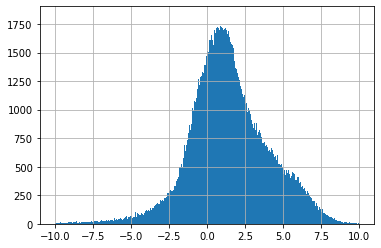

In [ ]:
df4 = df3
df4['Error'] = df4['Error'][df4['Error'] < 10]
df4['Error'] = df4['Error'][df4['Error'] > -10]
hist = df4['Error'].hist(bins=500)


In [ ]:
def reshape_y_pred(image, y_pred):
    image_reference = image[-1,:,:]
    nan_mask = np.isnan(image_reference)
    image_reference_no_nan = image_reference[~nan_mask]
    image_reference_empty = np.empty_like(image_reference)
    image_reference_empty.fill(np.nan)
    image_reference_empty[~nan_mask] = y_pred
    y_pred = image_reference_empty
    y_pred_reshape = y_pred.reshape(image_reference.shape)
    return y_pred_reshape

In [ ]:
y_pred_1_reshape = reshape_y_pred(image_area_1,y_pred_1)
print(y_pred_1_reshape.shape, 'y_pred_1')
y_test_1_reshape = reshape_y_pred(image_area_1,y_test_1)
print(y_test_1_reshape.shape, 'y_test_1')

y_pred_2_reshape = reshape_y_pred(image_area_2,y_pred_2)
print(y_pred_2_reshape.shape, 'y_pred_2')
y_test_2_reshape = reshape_y_pred(image_area_2,y_test_2)
print(y_test_2_reshape.shape, 'y_test_2')

y_pred_3_reshape = reshape_y_pred(image_area_3,y_pred_3)
print(y_pred_3_reshape.shape, 'y_pred_3')
y_test_3_reshape = reshape_y_pred(image_area_3,y_test_3)
print(y_test_3_reshape.shape, 'y_test_3')

y_pred_4_reshape = reshape_y_pred(image_area_4,y_pred_4)
print(y_pred_4_reshape.shape, 'y_pred_4')
y_test_4_reshape = reshape_y_pred(image_area_4,y_test_4)
print(y_test_4_reshape.shape, 'y_test_4')

(390, 1800) y_pred_1
(390, 1800) y_test_1
(310, 1800) y_pred_2
(310, 1800) y_test_2
(600, 920) y_pred_3
(600, 920) y_test_3
(600, 880) y_pred_4
(600, 880) y_test_4


In [ ]:
y_pred_2_reshape_padded = np.pad(y_pred_2_reshape, ((0,80),(0,0)), 'constant', constant_values=(np.nan,))

In [ ]:
y_pred_1_2 = np.concatenate((y_pred_1_reshape, y_pred_2_reshape_padded), axis = 0)
y_pred_1_2 = y_pred_1_2[0:-80,:]

In [ ]:
y_pred_4_reshape_padded = np.pad(y_pred_4_reshape, ((0,0),(0,40)), 'constant', constant_values=(np.nan,))


In [ ]:
y_pred_3_4 = np.concatenate((y_pred_3_reshape, y_pred_4_reshape_padded), axis = 1)
y_pred_3_4 = y_pred_3_4[:,:-40]

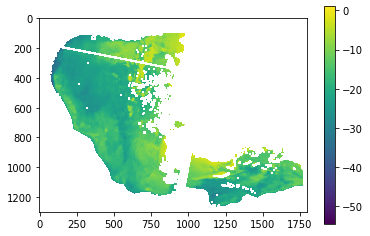

In [ ]:
y_pred_3_4_padded = np.pad(y_pred_3_4, ((0,100),(0,0)), 'constant', constant_values=(np.nan,))
y_pred_1_2_3_4 = np.concatenate((y_pred_1_2, y_pred_3_4_padded), axis = 0)
y_pred_1_2_3_4 = y_pred_1_2_3_4[0:-100,:]
pc = plt.imshow(y_pred_1_2_3_4)
plt.colorbar(pc)

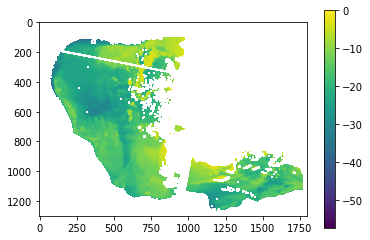

In [ ]:
y_test_2_reshape_padded = np.pad(y_test_2_reshape, ((0,80),(0,0)), 'constant', constant_values=(np.nan,))
y_test_1_2 = np.concatenate((y_test_1_reshape, y_test_2_reshape_padded), axis = 0)
y_test_1_2 = y_test_1_2[0:-80,:]
y_test_4_reshape_padded = np.pad(y_test_4_reshape, ((0,0),(0,40)), 'constant', constant_values=(np.nan,))
y_test_3_4 = np.concatenate((y_test_3_reshape, y_test_4_reshape_padded), axis = 1)
y_test_3_4 = y_test_3_4[:,:-40]
y_test_3_4_padded = np.pad(y_test_3_4, ((0,100),(0,0)), 'constant', constant_values=(np.nan,))
y_test_1_2_3_4 = np.concatenate((y_test_1_2, y_test_3_4_padded), axis = 0)
y_test_1_2_3_4 = y_test_1_2_3_4[0:-100,:]
pc = plt.imshow(y_test_1_2_3_4)
plt.colorbar(pc)

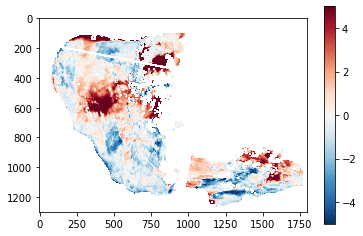

In [ ]:
import matplotlib.colors as mcolors
error = y_pred_1_2_3_4-y_test_1_2_3_4
norm = mcolors.TwoSlopeNorm(vmin=-5, vmax = 5, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

In [ ]:
predictions = np.array(y_pred_1_2_3_4)
y_test = np.array(y_test_1_2_3_4)
print(predictions.shape)

# Calculate the RMSE
rmse = np.sqrt(np.nanmean((predictions - y_test) ** 2))
print('RMSE:', rmse)

y_test_flat = y_test.flatten()
predictions_flat = predictions.flatten()
df_pred = pd.DataFrame(predictions_flat)
df_test = pd.DataFrame(y_test_flat)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
df2= df2[df2['Reference'] < 0] # set max ref depth
df2= df2[df2['Predicted'] > -50] # set max ref depth
df2= df2[df2['Predicted'] < 0] # set max ref depth

#df2= df2[df2['Reference'] > -10] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

(1300, 1800)
RMSE: 3.0425994
MAE: 2.0009918
RMSE 3.0419526
R2: 0.8244471330039757


<ipython-input-51-6f15d2ebe77e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Error'] = df4['Error'][df4['Error'] < 10]
<ipython-input-51-6f15d2ebe77e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Error'] = df4['Error'][df4['Error'] > -10]


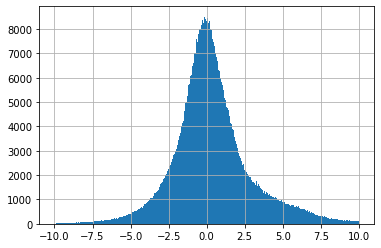

In [ ]:
df4 = df3[df3['Predicted'] >-30]
df4['Error'] = df4['Error'][df4['Error'] < 10]
df4['Error'] = df4['Error'][df4['Error'] > -10]
hist = df4['Error'].hist(bins=500)

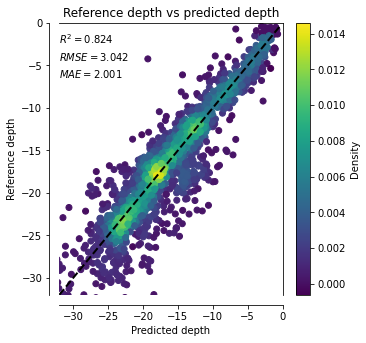

In [ ]:
df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-32,0])
    ax.set_ylim([-32,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-32, -2.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-32, -4.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-32, -6.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])

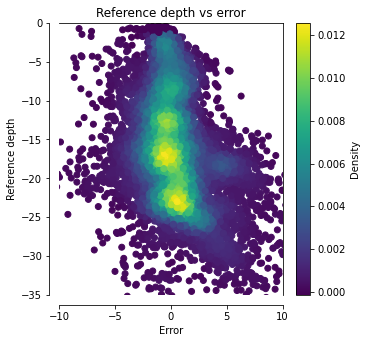

In [ ]:

df3_sample = df3.sample(n = 10000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-10,10])
    ax.set_ylim([-35,0])
    ax.set_xlabel("Error")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.8))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -4.1))

    #ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs error")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Error'], df3_sample['Reference'], bins = [30,30])

In [ ]:
np.save('4_XGBoost_PRISMA_predictions.npy', y_pred_1_2_3_4)
np.save('4_XGBoost_PRISMA_error.npy', error)
np.save('4_XGBoost_PRISMA_reference.npy', y_test_1_2_3_4)
df3.to_csv('4_XGBoost_PRISMA_dataframe.csv', index=False)


## XGBoost max 20m depth to train

In [ ]:
# PRISMA image:
with rasterio.open('/content/drive/MyDrive/PRISMA/PRISMA_mosaic_full.tif') as src:
    image = src.read()

In [ ]:
image[image==0] = np.nan # set 0 to NaN
image_no_ref = image[0:234,:,:] # select image without reference band
reference = image[234,:,:] # select reference band

In [ ]:
reference[reference<-20] = np.nan
reference[reference == 0] = np.nan
reference[reference>0] = np.nan

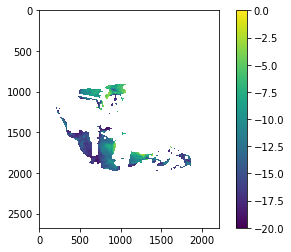

In [ ]:
pc = plt.imshow(reference)
plt.colorbar(pc)

In [ ]:
reference_1 = reference.copy()

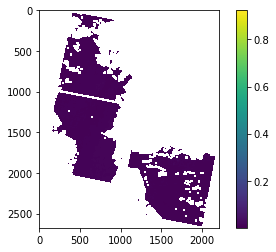

In [ ]:
pc = plt.imshow(image_no_ref[100,:,:])
plt.colorbar(pc)

In [ ]:
image_0 = np.nan_to_num(image)

In [ ]:
reference_1[reference_1 > 0] = 1
reference_1[reference_1 < 0] = 1

In [ ]:
unique, counts = np.unique(reference_1, return_counts=True)
print(np.asarray((unique, counts)).T)

[[1.000000e+00 5.936000e+05]
 [         nan 5.323036e+06]]


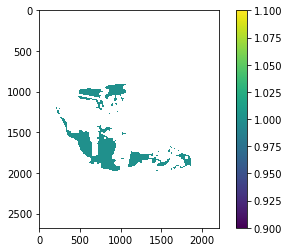

In [ ]:
pc = plt.imshow(reference_1)
plt.colorbar(pc)

In [ ]:
image_test = image_0 * reference_1

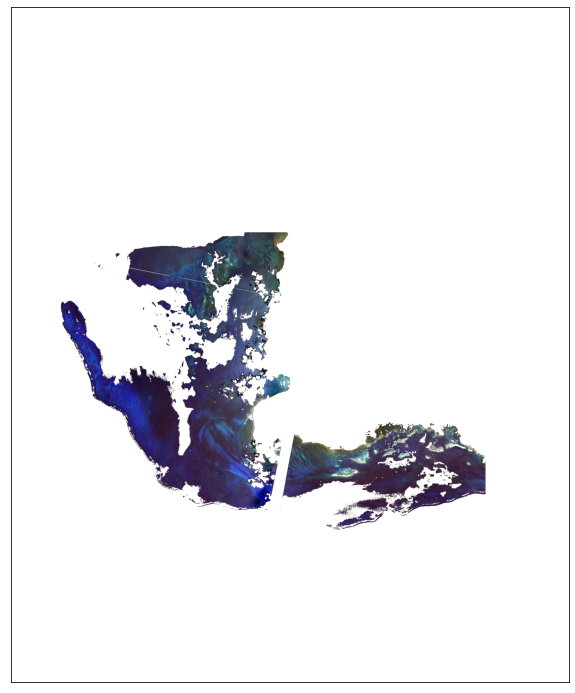

In [ ]:
ep.plot_rgb(image_test,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
for i in range(235):
  image_red = image_test[i,:,:]
  image_red = image_red[~np.isnan(image_red)]
  shape = image_red.shape[0]
  #print(shape)
  if shape != 593600:
   print(f'band {i} has uneven amount of pixels in this band')

# conclusion: all bands have got 593600 pixels

In [ ]:
image = image_test[:,800:2100,100:1900]

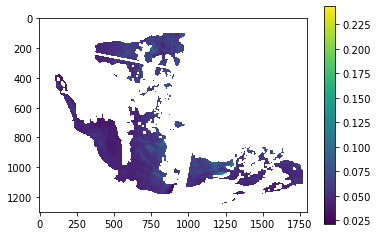

In [ ]:
pc = plt.imshow(image[20,:,:])
plt.colorbar(pc)

## Make area splits

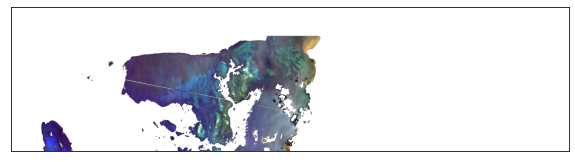

148141


In [ ]:
image_area_1 = image[:,0:465,:]
ep.plot_rgb(image_area_1,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_1[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

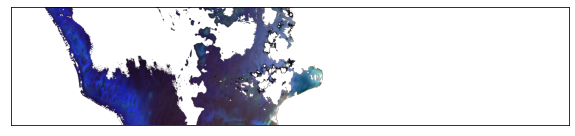

148245


In [ ]:
image_area_2 = image[:,465:847,:]
ep.plot_rgb(image_area_2,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_2[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

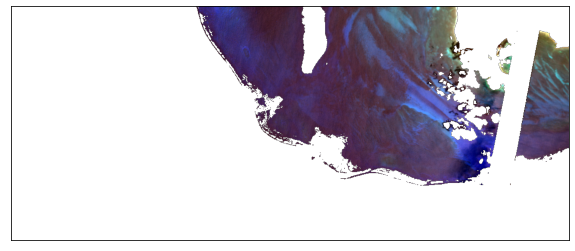

148421


In [ ]:
image_area_3 = image[:,847:,0:1080]
ep.plot_rgb(image_area_3,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_3[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

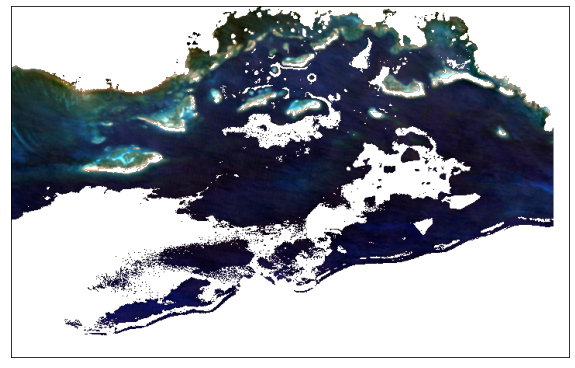

148421


In [ ]:
image_area_4 = image[:,847:,1080:]
ep.plot_rgb(image_area_4,
            rgb=(30, 20, 10),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

image_red = image_area_3[10,:,:]
image_red = image_red[~np.isnan(image_red)]
shape = image_red.shape[0]
print(shape)

In [ ]:
image_1_shape = np.moveaxis(image_area_1, 0, -1)
image_1_no_nan = image_1_shape[~np.isnan(image_1_shape).any(axis=2)]

image_2_shape = np.moveaxis(image_area_2, 0, -1)
image_2_no_nan = image_2_shape[~np.isnan(image_2_shape).any(axis=2)]

image_3_shape = np.moveaxis(image_area_3, 0, -1)
image_3_no_nan = image_3_shape[~np.isnan(image_3_shape).any(axis=2)]

image_4_shape = np.moveaxis(image_area_4, 0, -1)
image_4_no_nan = image_4_shape[~np.isnan(image_4_shape).any(axis=2)]

In [ ]:
# train splits X:
X_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:-1]
print(X_train_1_2_3.shape)
X_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:-1]
print(X_train_1_2_4.shape)
X_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:-1]
print(X_train_1_3_4.shape)
X_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:-1]
print(X_train_2_3_4.shape)

# train splits y:
y_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,-1]
print(y_train_1_2_3.shape)
y_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_2_4.shape)
y_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_3_4.shape)
y_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_2_3_4.shape)

(444807, 234)
(445179, 234)
(445355, 234)
(445459, 234)
(444807,)
(445179,)
(445355,)
(445459,)


In [ ]:
# Test splits X:
X_test_1 = image_1_no_nan[:,0:-1]
print(X_test_1.shape)
X_test_2 = image_2_no_nan[:,0:-1]
print(X_test_2.shape)
X_test_3 = image_3_no_nan[:,0:-1]
print(X_test_3.shape)
X_test_4 = image_4_no_nan[:,0:-1]
print(X_test_4.shape)

# Test splits y:
y_test_1 = image_1_no_nan[:,-1]
print(y_test_1.shape)
y_test_2 = image_2_no_nan[:,-1]
print(y_test_2.shape)
y_test_3 = image_3_no_nan[:,-1]
print(y_test_3.shape)
y_test_4 = image_4_no_nan[:,-1]
print(y_test_4.shape)

(148141, 234)
(148245, 234)
(148421, 234)
(148793, 234)
(148141,)
(148245,)
(148421,)
(148793,)


In [ ]:
model = xgb.XGBRegressor(
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 reg_lambda=0.1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 learning_rate =0.01,
 tree_method='gpu_hist',
 gpu_id=0,
 seed=27)

In [ ]:
# Train: 1,2,3. Test: 4
model.fit(X_train_1_2_3, y_train_1_2_3)
y_pred_4 = model.predict(X_test_4)

# Train: 1,2,4. Test: 3
model.fit(X_train_1_2_4, y_train_1_2_4)
y_pred_3 = model.predict(X_test_3)

# Train: 1,3,4. Test: 2
model.fit(X_train_1_3_4, y_train_1_3_4)
y_pred_2 = model.predict(X_test_2)

# Train: 2,3,4. Test: 1
model.fit(X_train_2_3_4, y_train_2_3_4)
y_pred_1 = model.predict(X_test_1)

In [ ]:
def calculate_metrics_area(y_pred, y_test):
    """
    This function takes in two inputs, y_pred_1_2_3 and a, and outputs the rmse, r2 and mae.
    """
    y = y_pred[~np.isnan(y_pred)]
    df_y_pred = pd.DataFrame(y)
    y_test = y_test.flatten()
    y_test = y_test[~np.isnan(y_test)]
    df_y_test = pd.DataFrame(y_test)
    # concatenate the two dataframes and remove NaN values
    df = pd.concat([df_y_test, df_y_pred], axis=1)
    df = df.dropna()
    df.columns = ['Reference','Predicted']
    df = df.reset_index(drop=True)
    df['Error'] = df['Predicted'] - df['Reference']
    # calculate metrics
    rmse = mean_squared_error(df.Reference, df.Predicted, squared=False)
    r2 = r2_score(df.Reference, df.Predicted)
    mae = np.mean(abs(df.Reference - df.Predicted))
    return rmse, r2, mae

In [ ]:
rmse,r2,mae = calculate_metrics_area(y_pred_1, y_test_1)
metrics_1 = list((rmse, r2, mae))
print(metrics_1,'area 1')

rmse,r2,mae = calculate_metrics_area(y_pred_2, y_test_2)
metrics_2 = list((rmse, r2, mae))
print(metrics_2, 'area 2')

rmse,r2,mae = calculate_metrics_area(y_pred_3, y_test_3)
metrics_3 = list((rmse, r2, mae))
print(metrics_3, 'area 3')

rmse,r2,mae = calculate_metrics_area(y_pred_4, y_test_4)
metrics_4 = list((rmse, r2, mae))
print(metrics_4, 'area 4')

[2.5802197, 0.7361938466789433, 1.710812] area 1
[2.0458453, 0.7736159827287168, 1.4656695] area 2
[1.2017397, 0.9121787824908493, 0.936508] area 3
[1.9496611, 0.8803368499050375, 1.4260391] area 4


In [ ]:
y_pred_1_reshape = reshape_y_pred(image_area_1,y_pred_1)
print(y_pred_1_reshape.shape, 'y_pred_1')
y_test_1_reshape = reshape_y_pred(image_area_1,y_test_1)
print(y_test_1_reshape.shape, 'y_test_1')

y_pred_2_reshape = reshape_y_pred(image_area_2,y_pred_2)
print(y_pred_2_reshape.shape, 'y_pred_2')
y_test_2_reshape = reshape_y_pred(image_area_2,y_test_2)
print(y_test_2_reshape.shape, 'y_test_2')

y_pred_3_reshape = reshape_y_pred(image_area_3,y_pred_3)
print(y_pred_3_reshape.shape, 'y_pred_3')
y_test_3_reshape = reshape_y_pred(image_area_3,y_test_3)
print(y_test_3_reshape.shape, 'y_test_3')

y_pred_4_reshape = reshape_y_pred(image_area_4,y_pred_4)
print(y_pred_4_reshape.shape, 'y_pred_4')
y_test_4_reshape = reshape_y_pred(image_area_4,y_test_4)
print(y_test_4_reshape.shape, 'y_test_4')

(465, 1800) y_pred_1
(465, 1800) y_test_1
(382, 1800) y_pred_2
(382, 1800) y_test_2
(453, 1080) y_pred_3
(453, 1080) y_test_3
(453, 720) y_pred_4
(453, 720) y_test_4


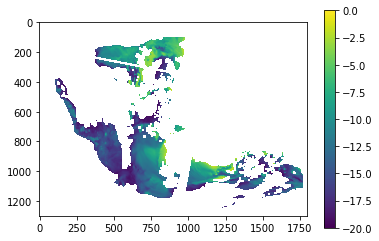

In [ ]:
y_test_2_reshape_padded = np.pad(y_test_2_reshape, ((0,83),(0,0)), 'constant', constant_values=(np.nan,))
y_test_1_2 = np.concatenate((y_test_1_reshape, y_test_2_reshape_padded), axis = 0)
y_test_1_2 = y_test_1_2[0:-83,:]
y_test_4_reshape_padded = np.pad(y_test_4_reshape, ((0,0),(0,360)), 'constant', constant_values=(np.nan,))
y_test_3_4 = np.concatenate((y_test_3_reshape, y_test_4_reshape_padded), axis = 1)
y_test_3_4 = y_test_3_4[:,:-360]
y_test_3_4_padded = np.pad(y_test_3_4, ((0,394),(0,0)), 'constant', constant_values=(np.nan,))
y_test_1_2_3_4 = np.concatenate((y_test_1_2, y_test_3_4_padded), axis = 0)
y_test_1_2_3_4 = y_test_1_2_3_4[0:-394,:]
pc = plt.imshow(y_test_1_2_3_4)
plt.colorbar(pc)

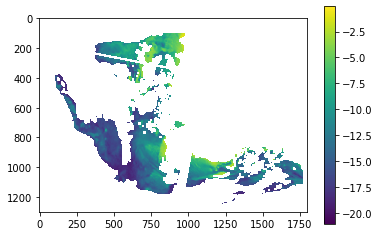

In [ ]:
y_pred_2_reshape_padded = np.pad(y_pred_2_reshape, ((0,83),(0,0)), 'constant', constant_values=(np.nan,))
y_pred_1_2 = np.concatenate((y_pred_1_reshape, y_pred_2_reshape_padded), axis = 0)
y_pred_1_2 = y_pred_1_2[0:-83,:]
y_pred_4_reshape_padded = np.pad(y_pred_4_reshape, ((0,0),(0,360)), 'constant', constant_values=(np.nan,))
y_pred_3_4 = np.concatenate((y_pred_3_reshape, y_pred_4_reshape_padded), axis = 1)
y_pred_3_4 = y_pred_3_4[:,:-360]
y_pred_3_4_padded = np.pad(y_pred_3_4, ((0,394),(0,0)), 'constant', constant_values=(np.nan,))
y_pred_1_2_3_4 = np.concatenate((y_pred_1_2, y_pred_3_4_padded), axis = 0)
y_pred_1_2_3_4 = y_pred_1_2_3_4[0:-394,:]
pc = plt.imshow(y_pred_1_2_3_4)
plt.colorbar(pc)

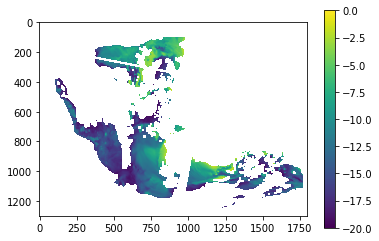

In [ ]:
y_test_3_4_padded = np.pad(y_test_3_4, ((0,394),(0,0)), 'constant', constant_values=(np.nan,))
y_test_1_2_3_4 = np.concatenate((y_test_1_2, y_test_3_4_padded), axis = 0)
y_test_1_2_3_4 = y_test_1_2_3_4[0:-394,:]
pc = plt.imshow(y_test_1_2_3_4)
plt.colorbar(pc)

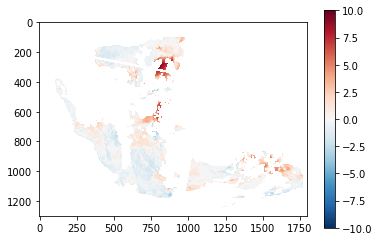

In [ ]:
import matplotlib.colors as mcolors
error = y_pred_1_2_3_4-y_test_1_2_3_4
norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

In [ ]:
y_pred_flat = y_pred_1_2_3_4.flatten()
y_pred_flat = y_pred_flat[~np.isnan(y_pred_flat)]
print(y_pred_flat.shape)

reference_flat = y_test_1_2_3_4.flatten()
reference_flat = reference_flat[~np.isnan(reference_flat)]
print(reference_flat.shape)


df_pred = pd.DataFrame(y_pred_flat)
df_test = pd.DataFrame(reference_flat)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
df2= df2[df2['Reference'] > -30] # set max ref depth
df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# # Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

(593600,)
(593600,)
MAE: 1.3846052
RMSE 2.0051591
R2: 0.8381043022284715


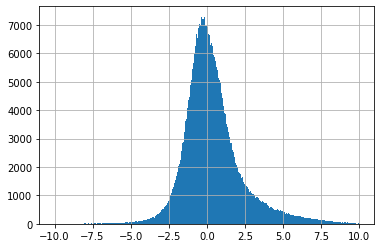

In [ ]:
df4 = df3[df3['Predicted'] >-30]
df4['Error'] = df4['Error'][df4['Error'] < 10]
df4['Error'] = df4['Error'][df4['Error'] > -10]
hist = df4['Error'].hist(bins=500)

In [ ]:
np.save('/content/drive/MyDrive/Predictions_final/4_XGBoost_PRISMA_predictions_20m.npy', y_pred_1_2_3_4)
np.save('/content/drive/MyDrive/Predictions_final/4_XGBoost_PRISMA_error_20m.npy', error)
np.save('/content/drive/MyDrive/Predictions_final/4_XGBoost_PRISMA_reference_20m.npy', y_test_1_2_3_4)
df3.to_csv('/content/drive/MyDrive/Predictions_final/4_XGBoost_PRISMA_dataframe_20m.csv', index=False)

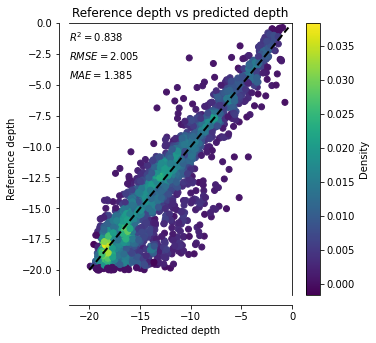

In [ ]:
df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-22,0])
    ax.set_ylim([-22,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-22, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-22, -3))
    ax.annotate("$MAE={:.3f}$".format(mae), (-22, -4.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])

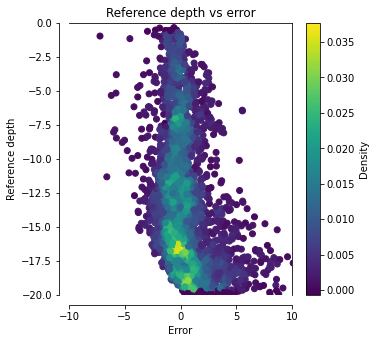

In [ ]:
# Depth vs error
#error.shape (1400,1400)
#reference.shape (1400, 1400)

error_flatten = error.flatten()
reference_flatten = y_test_1_2_3_4.flatten()

reference_df = pd.DataFrame(reference_flatten)
error_df = pd.DataFrame(error_flatten)

df = pd.concat([reference_df, error_df], axis=1) # Concatenate both dataframes
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Error']
df3 = df2.reset_index(drop=True)

df3_sample = df3.sample(n = 3000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-10,10])
    ax.set_ylim([-20,0])
    ax.set_xlabel("Error")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.8))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -4.1))

    #ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs error")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Error'], df3_sample['Reference'], bins = [30,30])